## Simulation of a Bouncing Basketball

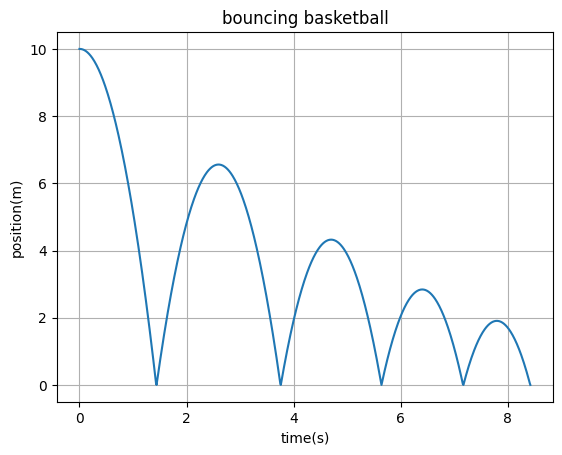

In [2]:
import matplotlib.pyplot as plt

def bouncing_ball_simulation(init_position, init_velocity, bounces):
    # paremeters for the simulation
    gravity = 9.8
    energy_loss_factor = 0.8
    
    # init lists for position and time
    positions=[init_position]
    times=[0.0]
    
    # loop that performs the simulation
    position = init_position
    velocity = init_velocity
    bounce_counter = 0
    
    while bounce_counter < bounces:
        # update time
        dt = 0.01
        t = times[-1] + dt
        
        # update position and velocity
        position += velocity * dt
        velocity -= gravity * dt
        
        # detecting collision with ground
        if position <= 0.0:
            position = 0.0
            velocity = -velocity * energy_loss_factor
            bounce_counter += 1
            
        # save positiona and time
        positions.append(position)
        times.append(t)
        
    return positions, times

# setting init conditions, height in m, initial velocity in m/s and number of bounces to simulate
init_position = 10.0
init_velocity = 0.0
bounces = 5

# simulate
positions, times = bouncing_ball_simulation(init_position, init_velocity, bounces)

# plot
plt.plot(times, positions)
plt.xlabel('time(s)')
plt.ylabel('position(m)')
plt.title('bouncing basketball')
plt.grid(True)
plt.show()